# Introduction: Home Credit Default Risk Competition

- 이 노트는 머신 러닝 대회에 처음 참가하거나 문제를 부드럽게 소개하려는 사람들을 위한 것입니다. 
- 나는 머신 러닝을 시작하는 방법의 기초를 보여주기 위해 복잡한 모델에 뛰어들거나 많은 데이터를 결합하는 것을 의도적으로 피한다! 
- 어떠한 의견이나 제안도 대단히 감사합니다.

- 이 노트에서는 현재 Kaggle에서 개최되는 Home Credit 기본 위험 머신 러닝 대회에 대해 초기에 살펴볼 것이다. 
- 이번 공모전의 목적은 과거 대출신청 자료를 활용해 신청자가 대출금을 상환할 수 있을지 여부를 예측하는 것이다. 다음은 표준 Supervised classification task입니다:

  - 감독: 레이블은 train 데이터에 포함되어 있으며 목표는 모델이 기능에서 레이블을 예측하는 방법을 학습하도록 훈련하는 것이다
  - 분류: 레이블은 이진 변수입니다. 0(대출을 제때 상환함), 1(대출 상환에 어려움이 있음)

# Data

- 이 데이터는 은행에 가입하지 않은 사람들에게 제공되는 신용(대출) 전용 서비스인 홈 크레딧에 의해 제공됩니다. 
- 고객의 대출 상환 여부나 어려움을 예측하는 것은 매우 중요한 비즈니스 요구이며, 홈 크레딧은 이 작업을 돕기 위해 머신러닝 커뮤니티가 어떤 모델을 개발할 수 있는지 알아보기 위해 카글에서 이 대회를 개최하고 있다.

- 7가지 다른 데이터 소스가 있습니다:

  - `application_train/application_test`: 홈 크레딧의 각 대출 신청에 대한 정보가 포함된 주요 train 및 test 데이터. 모든 대출에는 고유한 행이 있으며 feature `SK_ID_CURR`로 식별됩니다. train 애플리케이션 데이터는 TARGET=0: 대출이 상환되었거나 1=대출이 상환되지 않았음을 나타냅니다.
  - `bureau`: 다른 금융 기관으로부터의 고객의 이전 신용에 관한 데이터. 각 이전 크레딧은 부서에 고유한 행이 있지만 응용프로그램 데이터의 하나의 대출은 이전 크레딧을 여러 개 가질 수 있습니다.
  - `bureau_balance`: bureau의 이전 크레딧에 대한 월별 데이터. 각 행은 이전 크레딧의 한 달이며, 하나의 이전 크레딧은 크레딧 길이의 한 달마다 하나씩 여러 행을 가질 수 있습니다.
  - `previous_application`: 신청서 데이터에 대출이 있는 고객의 홈 크레딧에서 이전에 대출을 신청한 경우. 애플리케이션 데이터의 각 현재 대출은 이전 대출을 여러 개 가질 수 있다. 각 이전 애플리케이션은 하나의 행을 가지고 있으며 feature `SK_ID_PREV`로 식별됩니다.
  - `POS_CASH_BALANCE`: 고객이 홈 크레딧을 사용한 이전 판매 시점 또는 현금 대출에 대한 월별 데이터. 각 행은 이전 판매 시점 또는 현금 대출의 한 달이며, 이전 대출 하나에 여러 행이 있을 수 있습니다.
  - `credit_card_balance`: 고객이 Home Credit과 함께 사용한 이전 신용카드에 대한 월별 데이터. 각 행은 신용카드 잔액의 한 달이며, 하나의 신용카드는 여러 행을 가질 수 있다.
  - `installments_payment`: 홈 크레딧에서 이전 대출에 대한 지불 내역. 결제할 때마다 행이 하나씩 있고, 결제 누락 때마다 행이 하나씩 있습니다.

다음 다이어그램은 모든 데이터가 어떻게 관련되어 있는지 보여줍니다:

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

- 또한 모든 열의 정의(HomeCredit_columns_description.csv)와 예상 제출 파일의 예제가 제공됩니다.

- 본 노트북에서는 주요 애플리케이션 train 및 test 데이터만 사용할 것입니다. 
- 비록 우리가 심각하게 경쟁하고 싶은 희망을 갖고 싶다면, 우리는 모든 데이터를 사용해야 하지만, 지금은 더 관리하기 쉬운 하나의 파일을 고수할 것이다. 
- 이것은 우리가 개선할 수 있는 기준선을 설정할 수 있게 해줄 것이다. 이 프로젝트들로, 모든 것을 뛰어들어 완전히 길을 잃는 것보다 한 번에 문제에 대한 이해를 조금 쌓는 것이 가장 좋습니다!

# Metric: ROC AUC

- 일단 우리가 데이터를 파악하고 나면(열 설명을 읽는 것이 큰 도움이 된다), 우리는 우리의 제출을 판단하는 기준을 이해해야 한다. 
- 이 경우 곡선 아래의 수신기 작동 특성 영역(ROC AUC, AUROC라고도 함)으로 알려진 일반적인 분류 메트릭입니다.

- ROC AUC는 위협적으로 들릴 수 있지만, 일단 당신이 두 개의 개별적인 개념을 이해할 수 있다면 그것은 비교적 간단합니다. 
- 수신기 작동 특성(ROC) 곡선은 참 양의 비율 대 거짓 양의 비율을 그래프로 표시합니다
![image](https://www.mathworks.com/help//examples/nnet/win64/CompareDeepLearningModelsUsingROCCurvesExample_01.png)
- 그래프의 한 선은 단일 모형에 대한 곡선을 나타내며, 한 선을 따라 이동하면 양의 인스턴스(instance)를 분류하는 데 사용되는 임계값이 변경됨을 나타냅니다. 
- 임계값은 오른쪽 상단에서 시작하여 왼쪽 하단에서 1로 이동합니다. 왼쪽에 있는 곡선과 다른 곡선 위에 있는 곡선은 더 나은 모형을 나타냅니다. 
- 예를 들어, 파란색 모델이 빨간색 모델보다 낫고, 이는 순진한 무작위 추측 모델을 나타내는 검은색 대각선보다 낫습니다.
- 곡선 아래 영역(AUC)은 그 이름으로 스스로를 설명합니다! 이것은 단순히 ROC 곡선 아래의 영역입니다. (이것은 곡선의 적분입니다 이 메트릭은 0과 1 사이이며 더 나은 모델 점수가 매겨집니다. 랜덤하게 추측하는 모형의 ROC AUC는 0.5입니다)
- 우리가 ROCAUC에 따라 분류기를 측정할 때, 우리는 0이나 1의 예측을 생성하는 것이 아니라 0과 1 사이의 확률을 생성한다. 
- 이것은 우리가 보통 정확성의 관점에서 생각하는 것을 좋아하기 때문에 혼란스러울 수 있지만, 우리가 불균형한 클래스에 문제가 생겼을 때(우리는 이것이 사실이라는 것을 알게 될 것이다), 정확성은 최상의 지표가 아니다. 
- 예를 들어, 내가 99.9999%의 정확도로 테러리스트를 탐지할 수 있는 모델을 만들고 싶다면, 나는 단순히 모든 사람이 테러리스트가 아니라고 예측하는 모델을 만들 것이다. 
- 분명히, 이것은 효과적이지 않을 것이고(리콜은 0이 될 것이다) 우리는 분류기의 성능을 더 정확하게 반영하기 위해 ROCAUC 또는 F1 점수와 같은 더 고급 메트릭을 사용한다. 
- ROCAUC가 높은 모델도 정확도가 높지만 ROCAUC가 모델 성능을 더 잘 표현합니다.

- 사용 중인 데이터의 배경과 최대화를 위한 메트릭을 알 수는 없지만, 데이터를 살펴보도록 하겠습니다. 
- 앞에서 언급한 바와 같이 이 노트북에서는 향후 작업에서 구축할 수 있는 주요 데이터 소스와 간단한 모델을 고수할 것입니다.

# Import

우리는 정형 데이터 사이언스 스택을 사용할 것입니다: `numpy`, `pandas`, `sklean`, `matplotlib`.

In [1]:
# 데이터 조작을 위한 numpy, pandas
import numpy as np
import pandas as pd

# 범주형 변수를 다루기 위한 sklearn 전처리
from sklearn.preprocessing import LabelEncoder

# 파일 시스템 관리
import os

# 경고 억제
import warnings
warnings.filterwarnings('ignore')

# plotting을 위한 matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

- 첫째, 사용 가능한 모든 데이터 파일을 나열할 수 있습니다.
- train 메인 파일(Target 포함) 1개, 테스트용 메인 파일(Target 제외)1개, 예제 제출 파일 1개, 각 대출에 대한 추가 정보가 포함된 기타 파일 6개 등 총 9개의 파일이 있다.

In [2]:
# 사용 가능한 파일 리스트
print(os.listdir('/content/drive/MyDrive/home_credit_default_risk/'))

['HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv', 'log_reg_baseline.csv', 'random_forest_baseline.csv', 'random_forest_baseline_engineered.csv', 'random_forest_baseline_domain.csv']


In [3]:
# Train data
app_train = pd.read_csv('/content/drive/MyDrive/home_credit_default_risk/application_train.csv')
print(f'Training data shape: {app_train.shape}')
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Train 데이터에는 307511개의 관측치(각각 별도의 대출)와 TARGET(우리가 예측하려는 레이블)을 포함한 122개의 특징(변수)이 있습니다.

In [4]:
# Testing data features
app_test = pd.read_csv('/content/drive/MyDrive/home_credit_default_risk/application_test.csv')
print(f'Testing data shape: {app_test.shape}')
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Test 세트는 상당히 작고 TARGET 열이 없습니다.

# Exploratory Data Analysis

- 탐색적 데이터 분석(EDA)은 통계를 계산하고 데이터 내의 추세, 이상, 패턴 또는 관계를 찾기 위해 수치를 만드는 개방형 프로세스이다.
- EDA의 목표는 우리의 데이터가 우리에게 무엇을 말해줄 수 있는지를 배우는 것이다.
- 이는 일반적으로 높은 수준의 개요로 시작하여 흥미로운 데이터 영역을 찾을 때 특정 영역으로 좁혀집니다.
- 연구 결과는 그 자체로 흥미로울 수도 있고, 어떤 feature를 사용할지 결정하는 데 도움을 주는 등 모델링 선택을 알리는 데 사용될 수도 있습니다.

## Examine the Distribution of the Target Column

- Target은 대출에 대한 0이 제때 상환되었거나 고객이 지불에 어려움을 겪었음을 나타내는 1이 될 것으로 예상하는 것입니다.
- 우리는 먼저 각 범주에 속하는 대출의 수를 조사할 수 있습니다.

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

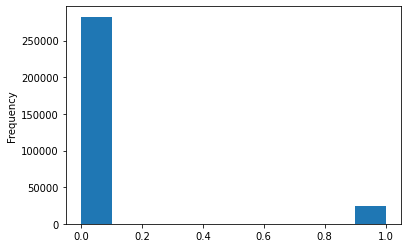

In [6]:
app_train['TARGET'].astype(int).plot.hist();

- 이 정보를 통해, 우리는 이것이 불균형한 계급 문제라는 것을 알 수 있습니다.
- 제때 갚지 못한 대출보다 제때 갚은 대출이 훨씬 많습니다.
- 우리가 더 정교한 머신 러닝 학습 모델에 들어가면, 우리는 이러한 불균형을 반영하기 위해 데이터에서 클래스의 표현을 기준으로 클래스의 가중치를 부여할 수 있다.

## Examine Missing Values

다음으로 각 열의 결측치 수와 백분율을 살펴보겠습니다.

In [7]:
# 결측치 계산 함수
def missing_values_table(df):
        # 전체 결측치 수
        mis_val = df.isnull().sum()
        
        # 결측치 백분율
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # 결과를 표에 넣기
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # 열 이름 바꾸기
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # 결측치 비율을 내림차순으로 정렬
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # 요약
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # 결측치 정보를 데이터프레임으로 변환
        return mis_val_table_ren_columns

In [8]:
# 결측치 통계
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


- 대부분의 범주형 변수는 고유 항목 수가 상대적으로 작습니다.
- 우리는 이러한 범주형 변수를 처리할 방법을 찾아야 합니다!

# Encoding Categorical Variables

- 우리는 더 나아가기 전에 성가신 범주형 변수를 다룰 필요가 있습니다.
- 머신 러닝 모델은 불행히도 범주형 변수를 처리할 수 없습니다(LightGBM과 같은 일부 모델 제외).
- 따라서, 우리는 이 변수들을 모델에 넘겨주기 전에 숫자로 인코딩(표현)하는 방법을 찾아야 합니다.
- 이 프로세스를 수행하는 데는 크게 두 가지 방법이 있습니다:
  - Label encoding
    - 범주형 변수에서 정수를 사용하여 각 고유 범주를 할당합니다.
    - 새 열이 생성되지 않습니다.
    - 아래에 예가 나와 있습니다.

  ![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

  - One-hot encoding
    - 범주형 변수의 각 고유 범주에 대해 새 열을 만듭니다.
    - 각 관측치는 해당 범주에 대해 열에 1을 수신하고 다른 모든 새 열에 0을 수신합니다.
  
  ![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/one_hot_encoding.png)


- Label encoding의 문제는 범주에 임의 순서를 부여한다는 것입니다.
- 각 범주에 할당된 값은 랜덤이며 범주의 고유한 측면을 반영하지 않습니다.
- 위의 예에서 프로그래머는 4를 받고 데이터 과학자는 1을 받지만, 만약 우리가 같은 과정을 다시 한다면, 라벨들은 반대이거나 완전히 다를 수 있습니다.
- 정수의 실제 할당은 임의입니다.
- 따라서 레이블 인코딩을 수행할 때 모델은 feature의 상대 값(예: 프로그래머=4 및 데이터 과학자=1)을 사용하여 우리가 원하는 것이 아닌 가중치를 할당할 수 있습니다.
- 범주형 변수(예: Male/Female)에 대해 두 개의 고유값만 있는 경우 레이블 인코딩은 괜찮지만, 두 개 이상의 고유 범주에 대해서는 One-hot 인코딩이 안전한 옵션입니다.
- 이러한 접근 방식의 상대적 장점에 대한 논쟁이 있으며, 일부 모델은 레이블 인코딩 범주형 변수를 문제 없이 처리할 수 있습니다.
- 다음은 Stack Overflow에 대한 좋은 논의입니다. 
  - 나는 (그리고 이것은 단지 개인적인 의견일 뿐이다) 많은 클래스가 있는 범주형 변수에 대해서는, 범주에 임의의 값을 부과하지 않기 때문에 One-Hot 인코딩이 가장 안전한 접근법이라고 생각합니다.
  - One-Hot 인코딩의 유일한 단점은 feature의 수(데이터의 차원)가 많은 범주를 가진 범주형 변수로 폭발할 수 있다는 것입니다.
  - 이를 해결하기 위해 PCA 또는 다른 차원 축소 방법에 이어 One-Hot 인코딩을 수행하여 (정보를 보존하려고 노력하는 동안) 차원 수를 줄일 수 있습니다.
- 이 노트북에서는 범주가 2개인 범주형 변수에는 레이블 인코딩을 사용하고 범주가 2개 이상인 범주형 변수에는 One-Hot 인코딩을 사용합니다.
- 이 프로세스는 프로젝트를 진행함에 따라 변경되어야 할 수도 있지만, 지금은 이 프로세스가 어떤 결과를 가져오는지 확인할 것입니다(또한 이 노트북에서는 차원 축소를 사용하지 않고 향후 반복 작업을 통해 살펴보겠습니다).

## Label Encoding and One-Hot Encoding

- 위에서 설명한 정책을 구현합시다.
- 고유 범주가 2개인 범주형 변수(`dtype==object`)에는 레이블 인코딩을 사용하고 고유 범주가 2개 이상인 범주형 변수에는 One-Hot 인코딩을 사용합니다.
- Label Encoding의 경우 sklearn label encoder를 사용하고 One-hot encoding의 경우 pandas get_dummies(df)함수를 사용합니다.

In [9]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
  if app_train[col].dtype == 'object':
    # If 2 or fewer unique categories
    if len(list(app_train[col].unique())) <=2:
      # Train on the training data
      le.fit(app_train[col])
      # Transform both training and testing data
      app_train[col] = le.transform(app_train[col])
      app_test[col] = le.transform(app_test[col])

      # Keep track of how many columns were label encoded
      le_count +=1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [10]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## Aligning Training and Testing Data

- Training data와 Testing data 모두에 동일한 feature(열)이 있어야 합니다.
- 테스트 데이터에 범주에 표시되지 않은 일부 범주형 변수가 있었기 때문에 One-Hot 인코딩으로 인해 Train 데이터에 더 많은 열이 생성되었습니다.
- 테스트 데이터에 없는 Train 데이터의 열을 제거하려면 데이터 프레임을 정렬해야 합니다.
- 먼저 Train 데이터에서 대상 column을 추출합니다(테스트 데이터에는 없지만 이 정보를 유지해야 하기 때문에). 정렬을 수행할 때는 행이 아닌 열을 기준으로 데이터 프레임을 정렬하도록 `axis=1`을 설정해야 합니다!

In [11]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print(f'Testing Features shape: {app_test.shape}')

Training Features shape:  (307511, 240)
Testing Features shape: (48744, 239)


- 이제 train 및 테스트 데이터셋은 머신 러닝에 필요한 feature와 동일합니다.
- One-Hot 인코딩으로 인해 Feature의 수가 크게 증가했습니다.
- 언젠가 우리는 데이터셋의 크기를 줄이기 위해 차원 축소(관련이 없는 feature 제거)를 시도할 것입니다.

# Back to Exploratory Data Analysis

## Anomalies

- EDA를 수행할 때 항상 주의해야 할 한 가지 문제는 데이터 내의 이상입니다.
- 숫자를 잘못 입력되었거나 측정 장비에 오류가 있거나 유효하지만 극단적인 측정일 수 있습니다.
- 이상 징후를 정량적으로 지원하는 한 가지 방법은 설명 방법을 사용하여 열의 통계를 보는 것입니다.
- `DAYS_BIRTH`열의 숫자는 현재 대출 신청과 관련하여 기록되기 때문에 음수입니다.
- 연도별로 이러한 통계를 보려면 -1을 곱하고 연도별 일 수로 나눌 수 있습니다.

In [12]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

- 이 feature는 합리적으로 보입니다.
- 상한 또는 하한에 연령에 대한 이상치가 없습니다.
- 취업 날짜는 어떻게 될까요?

In [13]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

- 이 Feature는 합리적이지 않습니다.
- 최댓값이 약 1000년입니다.

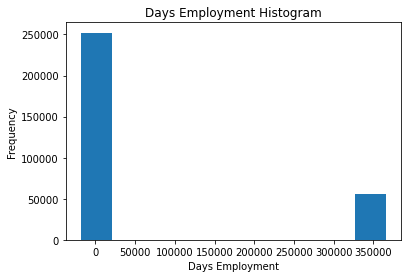

In [14]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');
plt.xlabel('Days Employment');

- 단지 호기심에서, 비정상적인 클라이언트들을 부분 집합화해서 그들이 다른 클라이언트들보다 채무 불이행 비율이 높은지 낮은지 알아보자.

In [15]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED']!=365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


- 이상치는 기본값 비율이 낮은 것으로 나타났습니다.

- 이상치를 처리하는 것은 규칙이 설정되지 않은 정확한 상황에 따라 다릅니다.
- 가장 안전한 접근법 중 하나는 이상치를 누락된 값으로 설정한 다음 machine learning 전에 이상치를 입력하는 것이다. 
- 이 경우 모든 변칙이 정확히 동일한 값을 가지기 때문에, 이 모든 대출이 공통점을 공유하는 경우에 대비하여 동일한 값으로 채우고자 합니다. 
- 변칙적인 값들은 어느 정도 중요한 것처럼 보이기 때문에, 우리는 실제로 이 값들을 채웠는지 machine learning 모델에 말하고 싶다. 
- 해결책으로, 우리는 변칙값을 숫자(np.nan)가 아닌 것으로 채우고 그 값이 변칙적이었는지 여부를 나타내는 새로운 bool 열을 만들 것이다.

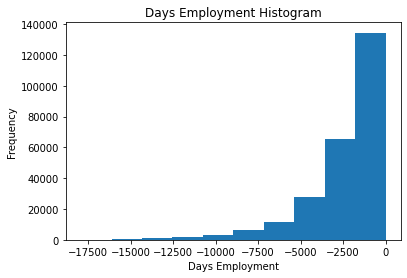

In [16]:
# Create an anomalies flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title= 'Days Employment Histogram');
plt.xlabel('Days Employment');

- 분포는 우리가 예상하는 것과 훨씬 더 일치하는 것으로 보이며, 우리는 또한 이러한 값들이 원래 변칙적이었다는 것을 모형에 알리기 위해 새로운 열을 만들었다(왜냐하면 우리는 일부 값, 아마도 열의 중위수로 NaN을 채워야 하기 때문이다).
- 데이터 프레임에 일이 있는 다른 열은 뚜렷한 특이치가 없는 예상 값과 같습니다.

- 매우 중요한 점은 train 데이터에 대해 수행하는 모든 작업이 test 데이터에도 수행되어야 한다는 것입니다. 
- 새 열을 생성하고 기존 열을 검정 데이터에 np.nan으로 채우도록 합시다.

In [17]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (app_test['DAYS_EMPLOYED_ANOM'].sum(),len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Correlations

- 이제 범주형 변수와 특이치를 다루었으므로 EDA로 계속 진행해 보겠습니다.
- 데이터를 이해하고 이해하는 한 가지 방법은 형상과 대상 사이의 상관 관계를 찾는 것이다. 
- `.corr` 데이터 프레임 방법을 사용하여 모든 변수와 대상 사이의 Pearson 상관 계수를 계산할 수 있습니다.

- 상관 계수는 형상의 "관련성"을 나타내는 가장 좋은 방법은 아니지만, 데이터 내에서 가능한 관계에 대한 아이디어를 제공한다. 
- 상관 계수의 절대값에 대한 일반적인 해석은 다음과 같다:
  - .00-.19 “매우 약한”
  - .20-.39 “약한”
  - .40-.59 “적당한”
  - .60-.79 “강한”
  - .80-1.0 “매우 강한”

In [18]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

- 몇 가지 유의한 상관 관계를 살펴보겠습니다. 
- `DAYS_BIRTH`는 가장 양의 상관 관계입니다. (변수와 변수의 상관관계가 항상 1이기 때문에 TARGET 제외!) 문서를 보면 `DAYS_BIRTH`는 대출 시점의 고객 연령(일 단위)을 마이너스 일로 나타낸 것입니다(어떤 이유로든!). 
- 상관 관계는 양수이지만 이 기능의 값은 실제로 음수입니다. 
- 즉, 고객이 나이가 들면서 대출을 연체할 가능성이 낮아집니다(즉, TARGET == 0). 
- 그것은 조금 헷갈리기 때문에, 우리는 형상의 절대값을 취한 다음 상관관계가 음수가 될 것이다.

### Effect of Age on Repayment

In [19]:
# Find the correlations of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

- 고객이 나이가 들수록 대출금을 제때 갚는 경향이 커진다는 것을 의미하는 목표와의 부정적인 선형 관계가 존재한다.

- 이제 이 변수를 살펴보겠습니다. 
- 먼저, 우리는 연령의 히스토그램을 만들 수 있습니다. 
- 우리는 plot을 좀 더 이해하기 쉽게 하기 위해 x축을 년 단위로 할 것이다.

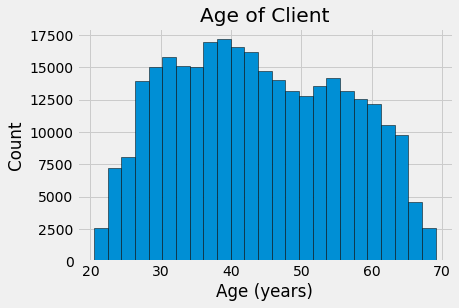

In [20]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

- 연령 분포 자체로는 모든 연령이 합리적이기 때문에 특이치가 없다는 것 외에는 다른 것을 알려주지 않습니다. 
- 연령이 대상에 미치는 영향을 시각화하기 위해 다음으로 대상 값으로 색칠된 커널 밀도 추정 그림(KDE)을 만들 것이다. 
- 커널 밀도 추정 플롯은 단일 변수의 분포를 보여주며 평활 히스토그램으로 생각할 수 있다(일반적으로 각 데이터 지점에서 커널(가우스)을 계산한 다음 모든 개별 커널을 평균하여 단일 평활 곡선을 개발함으로써 생성된다). 
- 우리는 이 그래프에 대해 seaborn kdeplot을 사용할 것이다.

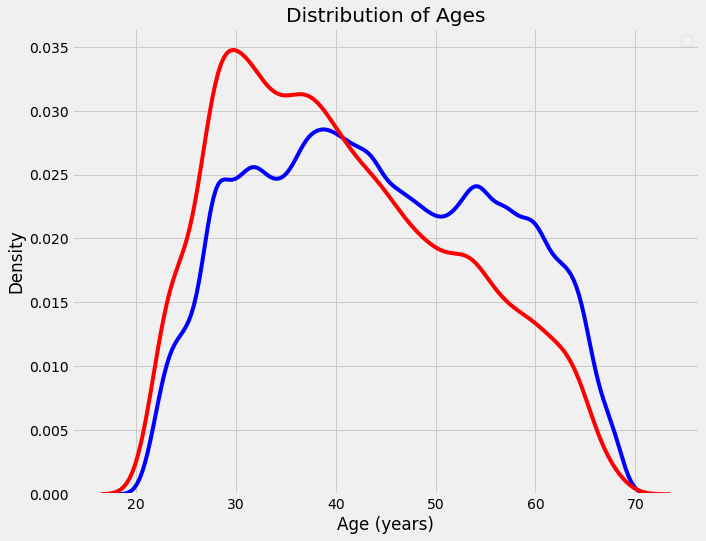

In [21]:
plt.figure(figsize=(10,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH']/365, color='b')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, color='r')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend();

- Target == 1 곡선은 범위의 젊은 끝 쪽으로 기울어집니다. 
- 이 변수는 유의한 상관 계수(-0.07 상관 계수)는 아니지만, 대상에 영향을 미치기 때문에 머신 러닝 모델에서 유용할 것입니다. 
- 이 관계를 다른 방식으로 살펴봅시다: 연령대별 평균 대출 상환 실패입니다.

- 이 그래프를 만들기 위해 먼저 연령 범주를 각각 5년 단위의 빈으로 자릅니다.
- 그런 다음, 각 bin에 대해 목표값의 평균값을 계산하는데, 이는 각 연령 범주에서 상환되지 않은 대출의 비율을 알려줍니다.

In [22]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin th age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins= np.linspace(20,70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [23]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


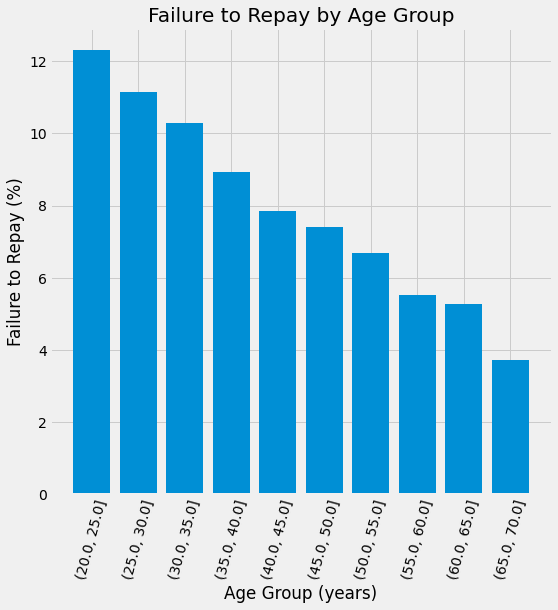

In [24]:
plt.figure(figsize=(8,8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

- 분명한 추세가 있다: 
- 젊은 지원자들이 대출금을 상환하지 않을 가능성이 더 높다! 
- 상환 불이행률은 가장 어린 세 연령대가 10% 이상, 가장 나이가 많은 연령대가 5% 이하다.

- 이것은 은행이 직접 사용할 수 있는 정보입니다. 
- 젊은 고객들이 대출금을 상환할 가능성이 낮기 때문에, 그들에게 더 많은 지침이나 재무 계획 팁을 제공해야 할 수도 있습니다. 
- 이것은 은행이 젊은 고객들을 차별해야 한다는 것을 의미하지는 않지만, 젊은 고객들이 제 때 지불할 수 있도록 예방 조치를 취하는 것이 현명할 것이다.

### Exterior Sources

- 대상과 음의 상관 관계가 가장 강한 변수는 `EXT_SOURCE_1`, `EXT_SOURCE_2` 및 `EXT_SOURCE_3`입니다. 
- 문서에 따르면 이러한 기능은 "외부 데이터 소스의 정규화된 점수"를 나타냅니다.
- 이것이 정확히 무엇을 의미하는지는 모르겠지만, 그것은 수많은 데이터 소스를 사용하여 만들어진 누적된 종류의 신용 등급일 수 있다.

- 이 변수들을 살펴봅시다.

- 먼저 `EXT_SOURCE` feature와 target 및 서로의 상관 관계를 보여줄 수 있습니다.

In [25]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs=ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


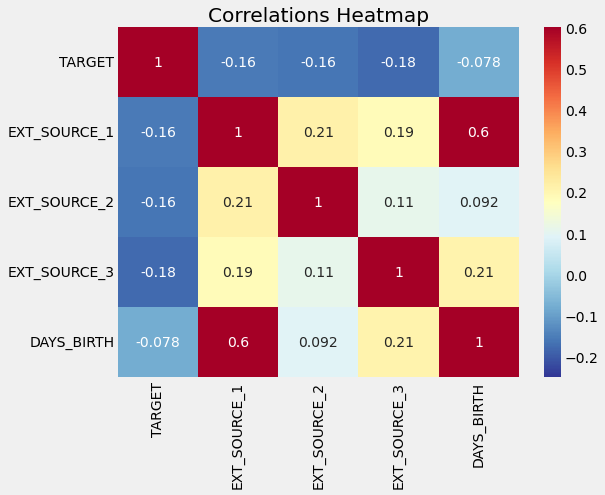

In [26]:
plt.figure(figsize=(8,6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlations Heatmap');

- 세 가지 `EXT_SOURCE` feature는 모두 대상과 음의 상관관계를 가지며, 이는 EXT_SOURCE의 가치가 증가할수록 클라이언트가 대출금을 상환할 가능성이 높다는 것을 나타낸다. 
- 또한 `DAYS_BIRTH`는 `EXT_SOURCE_1`과 양의 상관관계가 있으며 이 점수의 요인 중 하나가 클라이언트 연령임을 알 수 있습니다.

- 다음으로 목표값으로 색칠된 각 feature의 분포를 살펴볼 수 있다. 이를 통해 이 변수가 대상에 미치는 영향을 시각화할 수 있다.

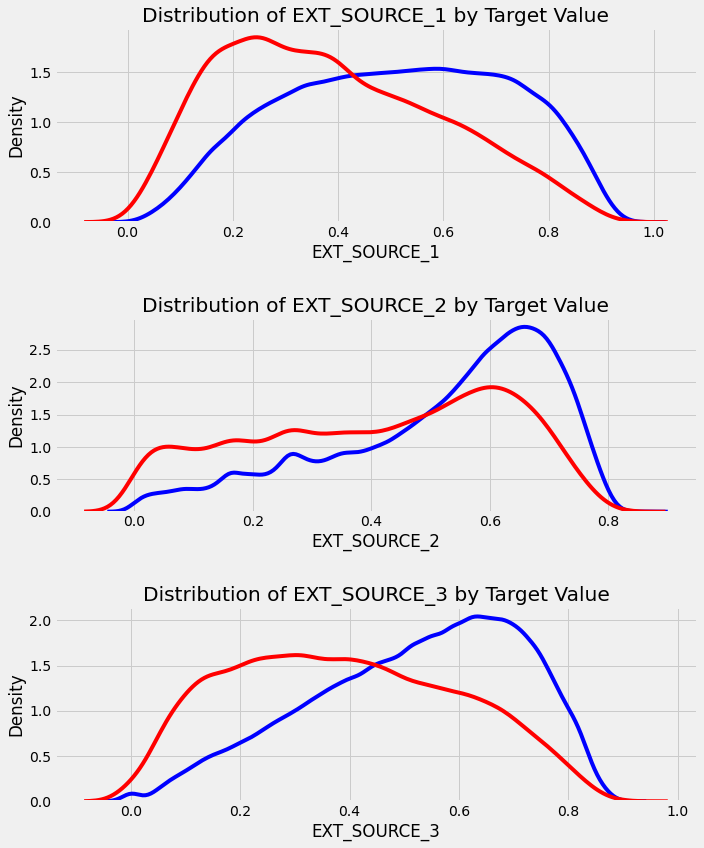

In [27]:
plt.figure(figsize=(10,12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

  # create a new subplot for each source
  plt.subplot(3, 1, i+1)
  # plot repaid loans
  sns.kdeplot(app_train.loc[app_train['TARGET']==0, source], color= 'b')
  sns.kdeplot(app_train.loc[app_train['TARGET']==1, source], color= 'r')

  # Label the plots
  plt.title('Distribution of %s by Target Value' % source)
  plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

- `EXT_SOURCE_3`은 대상 값 간에 가장 큰 차이를 표시합니다. 
- 우리는 이 특징이 신청자가 대출금을 상환할 가능성과 관련이 있다는 것을 분명히 알 수 있습니다. 
- 관계는 그리 강하지 않습니다(사실 모두 매우 약한 것으로 간주되지만, 이러한 변수는 신청자가 대출금을 제때 상환할지 여부를 예측하는 머신러닝 모델에 여전히 유용할 것입니다).

## Pairs Plot

- 최종 탐색 그림으로 `EXT_SOURCE` 변수와 `DAYS_BIRTH` 변수의 Pair Plot을 만들 수 있습니다. 
- Pair Plot은 단일 변수의 분포뿐만 아니라 여러 변수 쌍 간의 관계를 볼 수 있기 때문에 유용한 탐색 도구입니다. 
- 여기서 우리는 seaborn의 시각화 라이브러리와 PairGrid 함수를 사용하여 위쪽 삼각형의 산점도, 대각선의 히스토그램, 아래쪽 삼각형의 2D 커널 밀도 그림과 상관 계수를 가진 Pair Plot을 만들고 있다.

- 이 코드를 이해하지 못해도 괜찮습니다! 
- 파이썬에서 플로팅하는 것은 지나치게 복잡할 수 있으며, 가장 단순한 그래프 이상의 경우, 나는 보통 기존 구현을 찾아 코드를 수정한다(반복하지 않는다)!

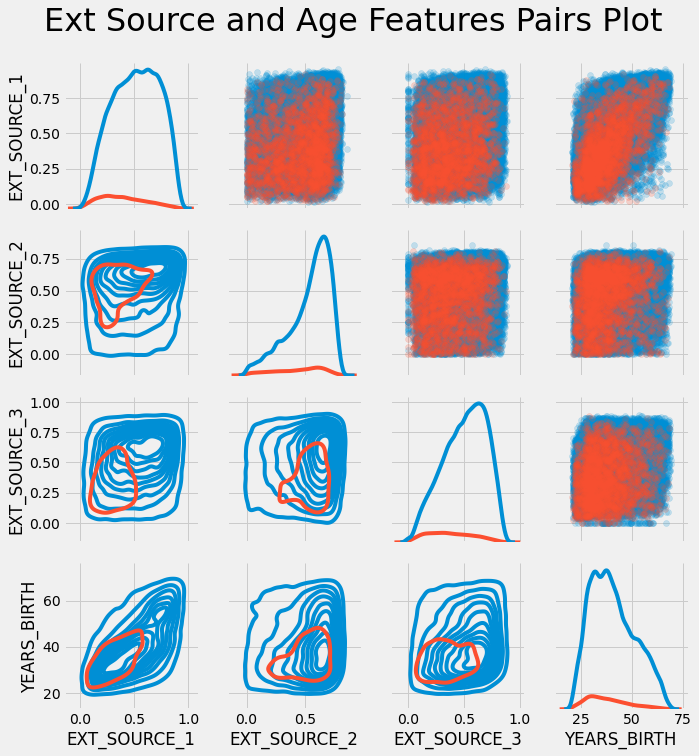

In [28]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

- 이 그림에서 빨간색은 상환되지 않은 대출을 나타내고 파란색은 상환된 대출을 나타냅니다. 
- 우리는 데이터 내에서 서로 다른 관계를 볼 수 있습니다. EXT_SOURCE_1과 DAYS_BIRTH(또는 동등하게 YEARS_BIRTH) 사이에는 중간 정도의 양의 선형 관계가 있는 것으로 보이며, 이는 이 기능이 클라이언트의 연령을 고려할 수 있음을 나타낸다.

# Feature Engineering

- 캐글 경쟁은 Feature Engineering에 의해 승리한다. 
- 우승한 사람들은 데이터에서 가장 유용한 feature를 만들 수 있는 사람들이다(적어도 구조화된 데이터의 경우 우승 모델은 모두 그레이디언트 부스팅의 변형인 경향이 있기 때문에 대부분 사실이다.). 
- 이것은 머신 러닝의 패턴 중 하나를 나타낸다. 
- Feature Engineering은 모델 구축 및 하이퍼 파라미터 튜닝보다 투자 수익률이 높다. 이것은 그 주제에 관한 훌륭한 기사이다. 
- 앤드류 응이 즐겨 말하듯이, "응용 머신 러닝은 기본적으로 Feature Engineering이다."

- 올바른 모델과 최적의 설정을 선택하는 것도 중요하지만, 모델은 주어진 데이터에서만 학습할 수 있습니다. 
- 이 데이터가 가능한 한 업무와 관련이 있는지 확인하는 것이 데이터 과학자의 일입니다(그리고 우리를 도와줄 자동화된 도구도 있습니다).

- Feature Engineering은 일반적인 프로세스를 가리키며 feature 구성(기존 데이터에서 새 feature 추가)과 feature 선택(가장 중요한 feature만 선택하거나 차원 축소의 다른 방법을 선택)을 모두 포함할 수 있습니다. 
- feature를 작성하고 feature를 선택하는 데 사용할 수 있는 많은 기술이 있습니다.

- 다른 데이터 소스를 사용하기 시작할 때는 많은 Feture Engineering을 수행하겠지만, 이 노트북에서는 다음과 같은 두 가지 간단한 feature 구성 방법만 시도해 보겠습니다:

  - Polynomial features
  - Domain knowledge features 

## Polynomial Features

- 한 가지 간단한 특징 구성 방법은 다항식 특징이라고 한다. 
- 이 방법에서, 우리는 기존 특징들 사이의 상호 작용 항뿐만 아니라 기존 특징들의 힘인 특징들을 만든다. 
- 예를 들어, 변수 `EXT_SOURCE_1^2`와 `EXT_SOURCE_2`, `EXT_SOURCE_1 x` `EXT_SOURCE_2^2`, `EXT_SOURCE_1^2` 등의 변수를 생성할 수 있습니다. 
- 여러 개별 변수의 조합인 이러한 특징은 변수 간의 교호작용을 캡처하기 때문에 교호작용 항이라고 합니다. 
- 즉, 두 변수 자체는 대상에 큰 영향을 미치지 않을 수 있지만, 이들을 하나의 교호작용 변수로 결합하면 대상과의 관계를 나타낼 수 있다. 
- 상호 작용 용어는 여러 변수의 효과를 포착하기 위해 통계 모델에서 일반적으로 사용되지만 머신 러닝에서 자주 사용되지는 않는다. 
- 그럼에도 불구하고 고객이 대출금을 상환할지 여부를 예측하는 데 도움이 될 수 있는지 몇 가지를 시도해 볼 수 있습니다.

- 다음 코드에서는 `EXT_SOURCE` 변수와 `DAYS_BIRTH` 변수를 사용하여 다항식 기능을 생성한다. 
- Skikit-Learn에는 다항식과 상호작용 항을 지정된 정도까지 생성하는 다항식 특성이라는 유용한 클래스가 있습니다. 
- 우리는 결과를 보기 위해 3도를 사용할 수 있다(다항식 특징을 만들 때, 우리는 특징의 수가 정도에 따라 기하급수적으로 증가하고 과적합 문제에 부딪힐 수 있기 때문에 너무 높은 정도를 사용하는 것을 피하고 싶다).

In [29]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# impute for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=3)

In [30]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print(f'Polynomial Features shape: {poly_features.shape}')

Polynomial Features shape: (307511, 35)


이를 통해 상당한 수의 새로운 feature가 생성됩니다. 이름을 얻으려면 다항식 feature `get_feature_names` 메서드를 사용해야 합니다.

In [31]:
poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

- 35개의 feature가 있으며 개별 feature가 3등급까지 향상되고 상호작용 용어가 사용됩니다. 
- 이제 이러한 새로운 feature가 대상과 상관관계가 있는지 확인할 수 있습니다.

In [32]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features, 
                             columns=poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                             'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


- 새로운 변수 중 몇 가지는 원래 특성보다 대상과 (절대 크기 측면에서) 더 큰 상관관계를 갖는다. 
- 우리가 머신 러닝 모델을 구축할 때, 우리는 이러한 feature가 모델의 학습에 실제로 도움이 되는지 여부를 결정하기 위해 이러한 feature가 있든 없든 시도할 수 있다.

- 이러한 feature가 train 및 test 데이터 복사본에 추가한 다음 feature가 있는 모델과 없는 모델을 평가합니다. 
- 머신 러닝에서, 접근법이 효과가 있을지 아는 유일한 방법은 그것을 시도하는 것이다!

In [33]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns= poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                                   'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')

# Merge polynomial features into testeing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

# Print out the new shapes
print(f'Training data with polynomial features shape: {app_train_poly.shape}')
print(f'Testing data with polynomial features shape: {app_test_poly.shape}')

Training data with polynomial features shape: (307511, 275)
Testing data with polynomial features shape: (48744, 275)


## Domain Knowledge Features

- 제가 신용 전문가가 아니기 때문에 이것을 "도메인 지식"이라고 부르는 것이 완전히 옳은 것은 아닐지도 모르지만, 아마도 우리는 이것을 "제한된 금융 지식을 적용하려는 시도"라고 부를 수 있을 것입니다. 
- 이러한 관점에서, 우리는 고객이 대출금을 연체할 것인지 여부를 알려주는 데 중요하다고 생각되는 것을 포착하기 위해 시도하는 두 가지 기능을 만들 수 있다.
- 여기서는 Aguiar의 이 스크립트에서 영감을 얻은 다섯 가지 기능을 사용할 것입니다:

  - `CREDIT_INCOME_PERCENT`: 고객의 소득에 대한 신용 금액의 백분율
  - `ANNUITY_INCOME_PERCENT`: 고객의 소득에 대한 대출 연금의 백분율
  - `CREDIT_TERM`: 지급 기간(월 단위)(연금이 지급해야 하는 월 금액이므로)
  - `DAYS_EMPLOYED_PERCENT`: 클라이언트의 연령에 대한 고용된 일수의 백분율
- 다시, 이러한 특징들을 탐구한 Aguiar와 그의 훌륭한 대본에 감사드립니다.

In [34]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [35]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### Visualize New Variables

- 우리는 이러한 도메인 지식 변수를 그래프로 시각적으로 탐구해야 한다. 
- 이 모든 것에 대해 TARGET 값으로 색칠된 동일한 KDE plot을 만들 것이다.

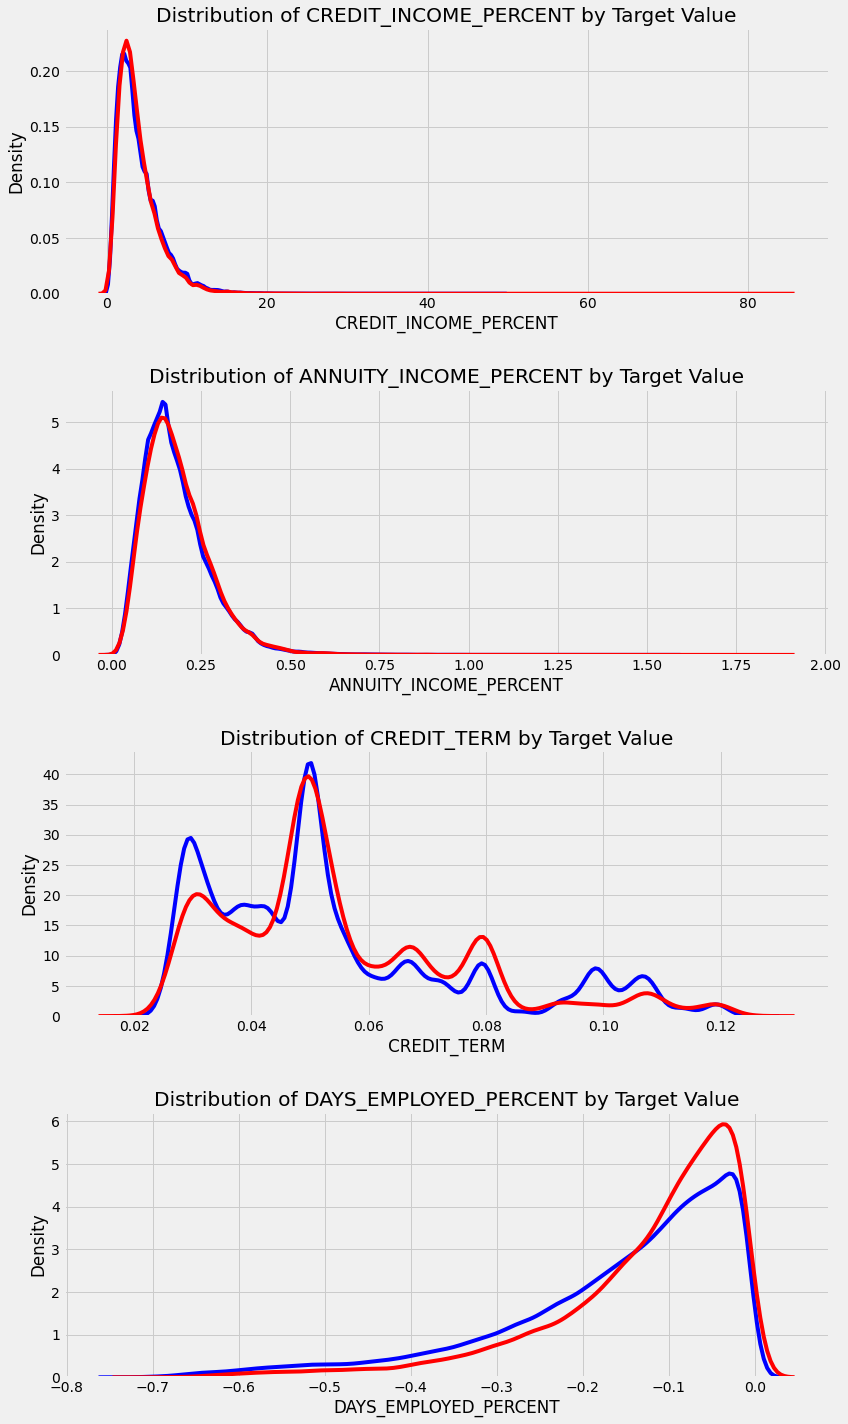

In [36]:
plt.figure(figsize=(12,20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

  # create  a new subplot for each source
  plt.subplot(4, 1, i+1)
  # plot repaid loans
  sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], color='b', label='Target==0')
  sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], color='r', label='Target==1')

  # Label the plots
  plt.title('Distribution of %s by Target Value' % feature)
  plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad=2.5)

- 이러한 새로운 기능이 유용할지 여부를 미리 말하기는 어렵습니다. 
- 확실히 알 수 있는 유일한 방법은 그것들을 사용해 보는 것입니다!

# Baseline

- 단순한 기본 모델의 경우 테스트 세트의 모든 예제에 대해 동일한 값을 추측할 수 있습니다. 
- 대출금을 상환하지 않을 확률을 예측해야 하므로, 완전히 확실하지 않은 경우 검정 세트에 대한 모든 관측치에 대해 0.5를 추측할 수 있습니다. 
- 이렇게 하면 경기에서 0.5점의 곡선 아래의 수신기 작동 특성 영역(AUCROC)을 얻을 수 있습니다(분류 과제에 대한 무작위 추측은 0.5점).

- 우리는 이미 몇 점을 받을지 알고 있기 때문에, 우리는 정말로 순진한 기본 추측을 할 필요가 없다. 
- 실제 기본 모델에 대해 조금 더 정교한 모델을 사용해 보겠습니다: Logistic Regression

## Logistic Regression Implementation

- 기준을 얻기 위해, 우리는 범주형 변수를 인코딩한 후 모든 기능을 사용할 것이다.
- 결측치(귀책)를 채우고 feature 범위를 정규화(feature 스케일링)하여 데이터를 전처리할 것이다. 
- 다음 코드는 이러한 사전 처리 단계를 모두 수행합니다.

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
if 'TARGET' in app_train:
  train = app_train.drop(columns=['TARGET'])
else:
  train = app_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')

# Sclae each feature to 0-1
scaler = MinMaxScaler(feature_range = (0,1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print(f'Training data shape: {train.shape}')
print(f'Testing data shape: {test.shape}')

Training data shape: (307511, 240)
Testing data shape: (48744, 240)


- 첫 번째 모형에 Scikit-Learn의 로지스틱 회귀 분석을 사용합니다. 
- 기본 모델 설정에서 변경할 수 있는 유일한 변경 사항은 과적합의 양을 제어하는 정규화 매개 변수 C를 낮추는 것입니다(낮은 값은 과적합이 감소함). 
- 이렇게 하면 기본 로지스틱 회귀 분석보다 약간 더 나은 결과를 얻을 수 있지만 미래의 모든 모형에 대해 낮은 막대를 설정할 수 있습니다.
- 먼저 모델을 생성한 다음 `.fit`을 사용하여 모델을 훈련한 다음 `.predict_proba`를 사용하여 테스트 데이터에 대한 예측을 한다(0이나 1이 아닌 확률을 원하는 것을 기억한다).

In [38]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C=0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

- 이제 모델이 훈련되었으므로, 우리는 그것을 예측하는 데 사용할 수 있습니다.
- 우리는 대출금을 지불하지 않을 확률을 예측하고자 하기 때문에 모델 `predict.proba` 방법을 사용합니다. 
- m x 2 배열을 반환합니다. 
- 여기서 m은 관측치의 수입니다. 
- 첫 번째 열은 목표값이 0일 확률이고 두 번째 열은 목표값이 1일 확률입니다(따라서 단일 행의 경우 두 열을 합하여 1이 되어야 함). 
- 우리는 대출금이 상환되지 않을 확률을 원하기 때문에 두 번째 칸을 선택할 것입니다.


In [39]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

- 예측은 sample_submission.csv 파일에 표시된 형식이어야 합니다. 
- 여기에는 SK_라는 두 개의 열만 있습니다`ID_CURR 및 TARGET`. 
- 우리는 테스트 세트와 제출이라는 예측으로부터 이 형식의 데이터 프레임을 만들 것이다.

In [40]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


- 이 예측은 대출금이 상환되지 않을 확률을 0과 1 사이로 나타냅니다. 
- 이러한 예측을 사용하여 신청자를 분류하는 경우, 대출이 위험하다고 판단하기 위한 확률 임계값을 설정할 수 있습니다.

In [41]:
submit.to_csv('/content/drive/MyDrive/home_credit_default_risk/log_reg_baseline.csv', index=False)

- 이제 제출한 내용이 노트북이 실행 중인 가상 환경에 저장되었습니다. 
- 제출물에 접근하기 위해, 우리는 노트북의 끝에서 커널의 오른쪽 상단에 있는 파란색 커밋 & 실행 버튼을 누를 것이다. 
- 그러면 전체 노트북이 실행된 다음 실행 중에 생성된 모든 파일을 다운로드할 수 있습니다.

- 노트북을 실행하면 생성된 파일이 출력 하위 탭 아래의 버전 탭에서 사용할 수 있습니다. 
- 여기서, 제출된 파일들은 대회에 제출하거나 다운로드 받을 수 있다. 이 노트북에는 여러 모델이 있으므로 여러 출력 파일이 있을 것입니다.

- 로지스틱 회귀 분석 기준선은 제출 시 약 0.671의 점수를 받아야 합니다.

# Improved Model: Random Forest

- 기본 모델의 저조한 성능을 극복하기 위해 알고리듬을 업데이트할 수 있다. 
- 동일한 train 데이터에서 Random Forest를 사용하여 성능에 어떤 영향을 미치는지 알아보겠습니다. 
- Random Forest는 특히 수백 그루의 나무를 사용할 때 훨씬 더 강력한 모델입니다.
- 우리는 무작위 숲에서 100그루의 나무를 사용할 것이다.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Make the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state=50, verbose=1, n_jobs=-1)

In [43]:
# Train on the Training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished


In [44]:
# Make a submissioin dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('/content/drive/MyDrive/home_credit_default_risk/random_forest_baseline.csv', index=False)

- 이러한 예측은 전체 노트북을 실행할 때도 사용할 수 있습니다.

- 이 모델은 제출 시 약 0.678점을 받아야 합니다.

## Make Predictions using Engineerined Features

- 다항식 feature와 도메인 지식이 모델을 개선했는지 확인하는 유일한 방법은 이러한 feature에 대한 테스트 모델을 교육하는 것입니다! 
- 그런 다음 이러한 feature이 없는 모델의 제출 성능과 비교하여 feature engineering의 효과를 측정할 수 있습니다.

In [45]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0,1))
poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state=50, verbose =1, n_jobs=-1)

In [46]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.5s finished


In [47]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('/content/drive/MyDrive/home_credit_default_risk/random_forest_baseline_engineered.csv', index=False)

- 이 모델은 대회에 출품되었을 때 0.678점을 받았는데, 이는 공학적 특징을 제외한 것과 정확히 같다. 
- 이러한 결과를 고려할 때, 우리의 feature 구성이 이 경우에 도움이 된 것으로 보이지 않는다.

## Testing Domain Features

이제 우리는 손으로 만든 도메인 feature를 테스트할 수 있습니다.

In [48]:
app_train_domain = app_train_domain.drop(columns='TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Sclae the domainnomial features
scaler = MinMaxScaler(feature_range = (0,1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state=50, verbose=1, n_jobs=-1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished


In [49]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('/content/drive/MyDrive/home_credit_default_risk/random_forest_baseline_domain.csv', index=False)

- 이 점수는 제출 시 0.679점으로, 엔지니어링된 기능이 이 모델에 도움이 되지 않는다는 것을 보여줍니다(노트북 끝의 그라데이션 부스팅 모델에는 도움이 됩니다).

- 이후 노트북에서는 다른 데이터 소스의 정보를 사용하여 더 많은 기능 엔지니어링을 수행할 것입니다. 
- 경험상, 이것은 확실히 우리 모델에게 도움이 될 것이다!

## Model Interpretation: Feature Importances

- 어떤 변수가 가장 관련성이 있는지 확인하는 간단한 방법으로 랜덤 포리스트의 feature importance를 살펴볼 수 있다. 
- 탐색적 데이터 분석에서 본 상관관계를 고려할 때, 우리는 가장 중요한 특징이 `EXT_SOURCE`와 `DAYS_BIRTH`라고 예상해야 한다. 
- 우리는 이러한 feature importance를 향후 작업에서 차원 축소 방법으로 사용할 수 있다.

In [50]:
def plot_feature_importances(df):
  '''
  모형에서 반환된 중요도를 표시합니다. 이 방법은 다음과 같은 모든 방법으로 작동할 수 있습니다
  중요성이 높은 것이 더 나은 경우 feature importance. 
    
    인수:
    df(데이터 프레임): 피쳐 중요도. 열에 피쳐가 있어야 함
    'importance'이라는 칼럼의 importance과 'importance'이라는 제목의 importance
        
    반환:
    가장 중요한 15가지 feature의 그림을 보여줍니다
        
    df(데이터 프레임): importance별로 정렬된 feature importance(최고에서 최저) 
    표준화된 중요성을 나타내는 컬럼을 사용하여
  '''
  # Sort features according to importance
  df = df.sort_values('importance', ascending=False).reset_index()

  # Normalize the feature importances to add up to one
  df['importance_normalized'] = df['importance'] / df['importance'].sum()

  # Make a horizontal bar chart of feature importaces
  plt.figure(figsize=(10,6))
  ax = plt.subplot()

  # Need to reverse the index to plot most important on top
  ax.barh(list(reversed(list(df.index[:15]))),
          df['importance_normalized'].head(15),
          align='center', edgecolor='k')
  
  # Set the yticks and labels
  ax.set_yticks(list(reversed(list(df.index[:15]))))
  ax.set_yticklabels(df['feature'].head(15))

  # Plot labeling
  plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
  plt.show()

  return df

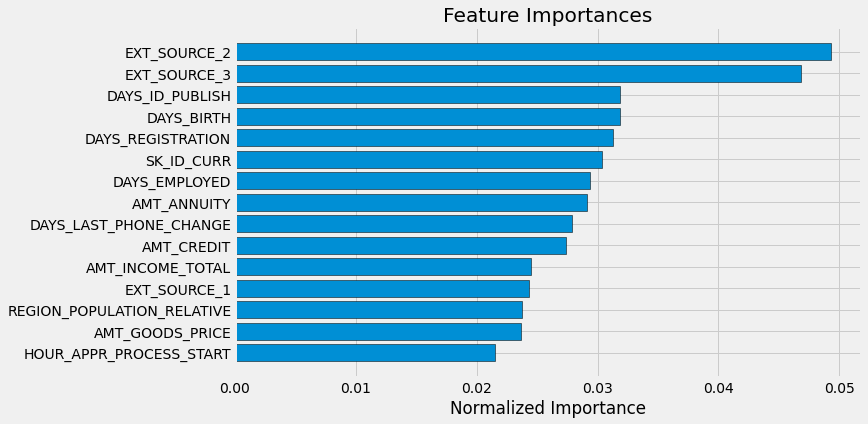

In [51]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importance)

- 예상대로, 가장 중요한 feature는 EXT_SOURCE와 DAYS_BIRTH를 다루는 feature이다.
- 모델에 중요한 feature이 몇 개밖에 없다는 것을 알 수 있으며, 이는 성능 저하 없이 많은 feature를 삭제할 수 있음을 시사합니다(그리고 성능이 향상될 수도 있음) 
- feature importance는 모델을 해석하거나 차원 축소를 수행하는 가장 정교한 방법은 아니지만, 모델이 예측할 때 어떤 요소를 고려하는지 이해할 수 있게 해준다.

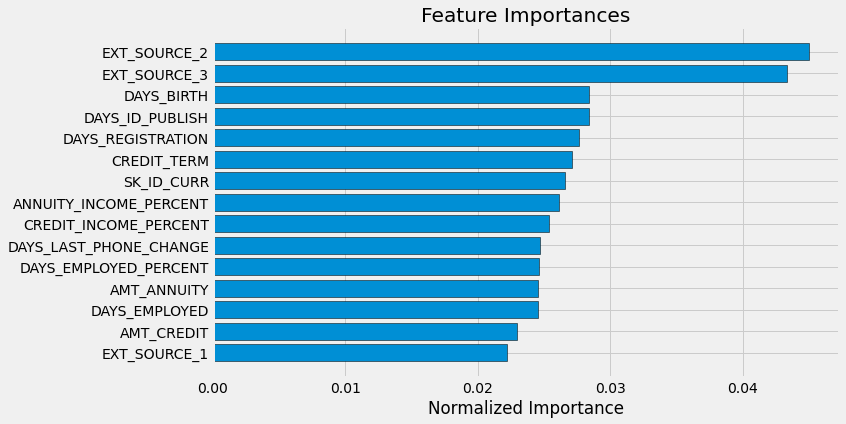

In [52]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

- 우리는 우리의 네 가지 수작업 기능 모두가 가장 중요한 15위 안에 들었다는 것을 알 수 있습니다! 
- 이것은 우리의 도메인 지식이 적어도 부분적으로 정상 궤도에 올랐다는 확신을 줄 것이다.

# Conclusions

이 노트에서는 Kaggle 머신 러닝 대회를 시작하는 방법을 살펴봤습니다. 우리는 먼저 데이터, 우리의 과제, 그리고 우리의 제출물을 판단하는 기준을 확실히 이해했다. 그런 다음, 우리는 모델링에 도움이 될 수 있는 관계, 추세 또는 이상 징후를 식별하기 위해 상당히 간단한 EDA를 수행했다. 그 과정에서 범주형 변수 인코딩, 결측값 귀속, 형상 범위 조정과 같은 필요한 전처리 단계를 수행했다. 그런 다음 기존 데이터에서 새로운 기능을 구성하여 모델에 도움이 될 수 있는지 확인했습니다.

데이터 탐색, 데이터 준비 및 기능 엔지니어링이 완료되면 개선하고자 하는 기준 모델을 구현했습니다. 그리고 나서 우리는 우리의 첫 점수를 이기기 위해 약간 더 복잡한 두 번째 모델을 만들었다. 우리는 또한 공학적 변수를 추가하는 효과를 결정하기 위한 실험을 수행했다.

우리는 기계 학습 프로젝트의 일반적인 개요를 따랐다:

1. 문제 및 데이터 이해
2. 데이터 정리 및 포맷(대부분 당사를 위해 수행됨)
3. 탐색적 데이터 분석
4. 기본 모델
5. 개선된 모델
6. 모델 해석(조금만)

머신 러닝 대회는 단일 메트릭에서 최고의 성능을 달성하는 것에만 관심이 있고 해석에는 관심이 없다는 점에서 일반적인 데이터 과학 문제와 약간 다르다. 그러나 모델이 결정을 내리는 방법을 이해하려고 시도함으로써 오류를 수정하기 위해 모델을 개선하거나 오류를 검사할 수 있다. 향후 노트북에서는 더 많은 데이터 소스를 통합하고, 더 복잡한 모델을 구축하며(다른 사람의 코드를 따름) 점수를 향상시키는 방법을 살펴볼 것입니다.

저는 이 노트북이 여러분을 이 기계 학습 대회에서 성공적으로 운영하게 하고 여러분이 이제 지역 사회의 도움을 받아 스스로 나가서 몇 가지 큰 문제에 착수할 준비가 되었기를 바랍니다!

노트북 실행: 이제 노트북 끝에 이르렀으니 파란색 Commit & Run 버튼을 눌러 모든 코드를 한 번에 실행할 수 있습니다. 실행이 완료되면(10분 정도 소요됨) 버전 탭으로 이동한 다음 출력 하위 탭으로 이동하여 생성된 파일에 액세스할 수 있습니다. 제출 파일은 이 탭에서 경쟁사에 직접 제출하거나 로컬 컴퓨터에 다운로드하여 저장할 수 있습니다. 마지막 부분은 노트북 공유입니다. 설정 탭으로 이동하여 표시를 공용으로 변경합니다. 이것은 전 세계가 여러분의 작품을 볼 수 있게 해줍니다!

# Just for Fun: Light Gradient Boosting Machine

- 이제(원하신다면, 이 부분은 전적으로 선택 사항입니다) 우리는 딥엔드에서 벗어나 LightGBM 라이브러리를 사용하는 그레이디언트 부스팅 머신이라는 실제 머신러닝 모델을 사용할 수 있습니다! 
- Gradient Boosting Machine은 현재 구조화된 데이터 세트(특히 Kaggle)에 대한 학습을 위한 선도적인 모델이며, 경쟁에서 잘하기 위해서는 이 모델의 어떤 형태가 필요할 것이다. 걱정하지 마세요. 
- 이 코드가 위협적으로 보일지라도, 그것은 완전한 모델로 구축되는 일련의 작은 단계일 뿐입니다. 
- 이 코드를 추가한 것은 이 프로젝트에 무엇이 준비되어 있는지 보여주기 위해서이며, 리더보드에서 약간 더 나은 점수를 얻을 수 있기 때문입니다. 
- 향후 노트북에서는 보다 고급 모델(대부분 기존 코드를 적용하여 더 잘 작동하도록 함), 기능 엔지니어링 및 기능 선택을 사용하는 방법에 대해 알아보겠습니다. 


In [53]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [54]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.79887	train's binary_logloss: 0.547648	valid's auc: 0.754949	valid's binary_logloss: 0.563125
Early stopping, best iteration is:
[208]	train's auc: 0.80025	train's binary_logloss: 0.546264	valid's auc: 0.755109	valid's binary_logloss: 0.562276
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.798518	train's binary_logloss: 0.548144	valid's auc: 0.758539	valid's binary_logloss: 0.563479
Early stopping, best iteration is:
[217]	train's auc: 0.801374	train's binary_logloss: 0.545314	valid's auc: 0.758619	valid's binary_logloss: 0.561732
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.79774	train's binary_logloss: 0.54923	valid's auc: 0.762652	valid's binary_logloss: 0.564246
[400]	train's auc: 0.827288	train's binary_logloss: 0.520152	valid's auc: 0.762202	valid's bina

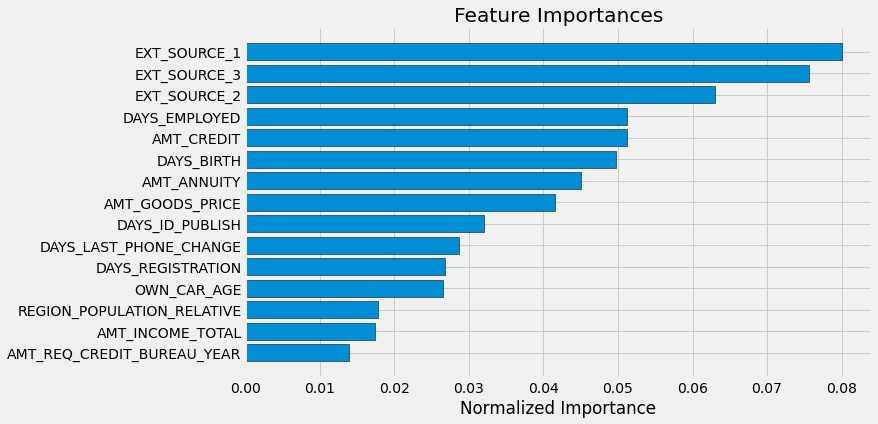

In [55]:
fi_sorted = plot_feature_importances(fi)

In [56]:
submit.to_csv('/content/drive/MyDrive/home_credit_default_risk/baseline_lgb.csv', index=False)

- 이 제출물은 리더보드에서 약 0.735점을 받아야 합니다. 
- 우리는 미래의 일에서 확실히 그것을 최고로 할 것이다!

In [57]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.804531	train's binary_logloss: 0.541661	valid's auc: 0.762577	valid's binary_logloss: 0.557281
Early stopping, best iteration is:
[237]	train's auc: 0.810671	train's binary_logloss: 0.535426	valid's auc: 0.762858	valid's binary_logloss: 0.553438
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.804304	train's binary_logloss: 0.542018	valid's auc: 0.765594	valid's binary_logloss: 0.55808
Early stopping, best iteration is:
[227]	train's auc: 0.808665	train's binary_logloss: 0.537574	valid's auc: 0.765861	valid's binary_logloss: 0.555268
Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.803753	train's binary_logloss: 0.542936	valid's auc: 0.770139	valid's binary_logloss: 0.557892
[400]	train's auc: 0.834338	train's binary_logloss: 0.511693	valid's auc: 0.770328	valid's b

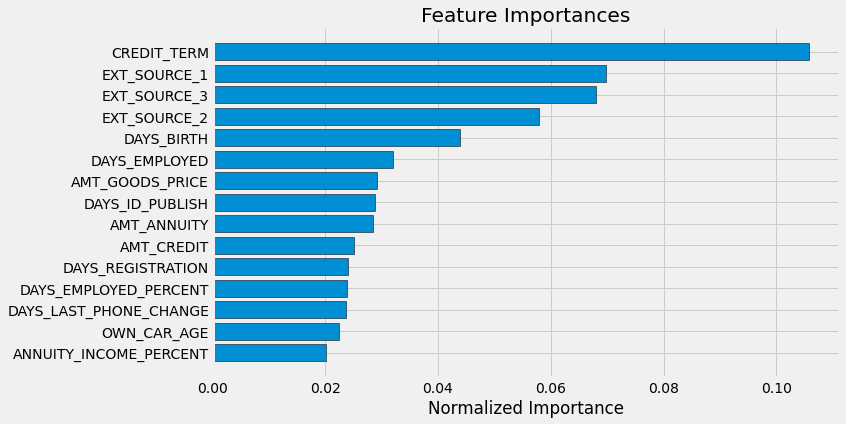

In [58]:
fi_sorted = plot_feature_importances(fi_domain)

- 다시 말하지만, 우리는 우리의 기능 중 일부가 그것을 가장 중요하게 만들었다는 것을 알 수 있다. 
- 앞으로, 우리는 이 문제에 유용한 다른 도메인 지식 기능이 무엇인지 생각해 볼 필요가 있을 것이다(또는 우리는 금융 산업에 대해 더 잘 아는 사람과 상담해야 한다!)!

In [59]:
submit.to_csv('/content/drive/MyDrive/home_credit_default_risk/baseline_lgb_domain_features.csv', index=False)

- 이 모델은 도메인 feature가 성능을 향상시킨다는 것을 나타내는 공개 리더보드에 제출될 때 약 0.754점을 받습니다! 
- feature engineering은 (모든 기계 학습 문제와 마찬가지로) 이 경쟁에서 중요한 부분이 될 것입니다!